# Problem -2: Implement Neural Network using Pytorch

In [1]:
import torch
import torch.nn as nn
import torchvision as thv
import numpy as np
from torch.utils.data import DataLoader
import torch.utils.data
import random
import torchvision.transforms as transforms
from numpy import linalg
import matplotlib.pyplot as plt

In [2]:
transform=transforms.Compose([transforms.ToTensor()])

train_data = thv.datasets.MNIST('./data' , transform=transform, download=True , train=True) 
val_data = thv.datasets.MNIST('./data', transform=transform, download=True, train=False)

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self, num_features, num_classes, dropout):
        super(NeuralNetwork,self).__init__()
        self.linear = nn.Linear(num_features, num_classes)
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self,x):
        x = self.linear(x)
        x = self.relu(x)
        x = self.softmax(x)
        return x

In [4]:
eta=0.01
batch_size=32

train_index=[]
val_index=[]

for i in range(0,60000):
    train_index.append(i)
for i in range(0,10000):
    val_index.append(i)
    
train_subset=torch.utils.data.Subset(train_data, random.sample(train_index,30000))
val_subset=torch.utils.data.Subset(val_data, random.sample(val_index,5000))

tloader=torch.utils.data.DataLoader(train_subset,batch_size=batch_size,shuffle=True)
vloader=torch.utils.data.DataLoader(val_subset,batch_size=batch_size,shuffle=True)

In [5]:
# neural_network=NeuralNetwork(784,10,dropout=0.25) # for SGD
neural_network=NeuralNetwork(784,10,dropout=0.50) # for adams

# using negative log likelihood as loss function
loss_nn = nn.NLLLoss()

# sgd_optimizer = torch.optim.SGD(neural_network.parameters(), lr=eta)
sgd_optimizer = torch.optim.Adam(neural_network.parameters(), lr=eta) # for adams

In [6]:
epochs=200
loss=[]
val_loss=[]
val_acc=[]
tacc_list=[]
vacc_list=[]
train_error=[]
val_error=[]
train_loss=[]
batch_val_loss=[]

for epoch in range(epochs):
    train_acc=0
    test_acc=0
    train_epoch_loss =[]
    test_epoch_loss=[]
    print("Epoch: ",epoch+1)
    for i ,(input_img,target_labels) in enumerate(tloader):
        input_img = input_img.view(-1,28*28)
        sgd_optimizer.zero_grad()
        nn_output = neural_network(input_img)
#           print(nn_output.shape,target_labels.shape)
        training_loss = loss_nn(nn_output, target_labels)
        train_epoch_loss.append(training_loss.item())
        train_loss.append(training_loss.item())
        _, predicted = torch.max(nn_output,1)     
        train_acc += np.count_nonzero(predicted.data.numpy() == target_labels.data.numpy())
        training_loss.backward()
        sgd_optimizer.step()
    loss.append(np.mean(train_epoch_loss))
    tacc_list.append((train_acc/30000) *100)
    train_error.append(100-((train_acc/30000) *100))
    print("Train Accuracy:",tacc_list[-1])
    
#     test_epoch_loss = []
    for i ,(input_img,target_labels) in enumerate(vloader):
        input_img = input_img.view(-1,28*28)
        nn_output = neural_network(input_img)
#           print(nn_output.shape,target_labels.shape)
        validation_loss = loss_nn(nn_output, target_labels)
        test_epoch_loss.append(validation_loss.item())
        batch_val_loss.append(validation_loss.item())
        _, predicted = torch.max(nn_output,1)     
        test_acc += np.count_nonzero(predicted.data.numpy() == target_labels.data.numpy())
#             validation_loss.backward()
#             sgd_optimizer.step()
    val_loss.append(np.mean(test_epoch_loss))
    vacc_list.append((test_acc/5000) *100)
    val_error.append(100-((test_acc/5000) *100))
    print("Test Accuracy:",vacc_list[-1])
    

Epoch:  1
Train Accuracy: 71.46666666666667
Test Accuracy: 74.7
Epoch:  2
Train Accuracy: 73.94
Test Accuracy: 74.88
Epoch:  3
Train Accuracy: 74.20333333333333
Test Accuracy: 75.03999999999999
Epoch:  4
Train Accuracy: 74.47
Test Accuracy: 74.36
Epoch:  5
Train Accuracy: 74.63333333333333
Test Accuracy: 74.48
Epoch:  6
Train Accuracy: 74.70333333333333
Test Accuracy: 74.06
Epoch:  7
Train Accuracy: 74.73666666666666
Test Accuracy: 74.36
Epoch:  8
Train Accuracy: 74.62
Test Accuracy: 74.53999999999999
Epoch:  9
Train Accuracy: 74.98333333333333
Test Accuracy: 74.68
Epoch:  10
Train Accuracy: 74.83
Test Accuracy: 74.2
Epoch:  11
Train Accuracy: 74.74
Test Accuracy: 74.83999999999999
Epoch:  12
Train Accuracy: 74.91666666666667
Test Accuracy: 74.26
Epoch:  13
Train Accuracy: 74.87666666666667
Test Accuracy: 74.53999999999999
Epoch:  14
Train Accuracy: 75.02666666666667
Test Accuracy: 74.3
Epoch:  15
Train Accuracy: 74.96333333333334
Test Accuracy: 73.72
Epoch:  16
Train Accuracy: 75.0433

Train Accuracy: 75.39333333333333
Test Accuracy: 72.98
Epoch:  127
Train Accuracy: 75.56
Test Accuracy: 73.44000000000001
Epoch:  128
Train Accuracy: 75.49666666666667
Test Accuracy: 73.52
Epoch:  129
Train Accuracy: 75.51666666666667
Test Accuracy: 73.2
Epoch:  130
Train Accuracy: 75.36666666666667
Test Accuracy: 73.24000000000001
Epoch:  131
Train Accuracy: 75.58666666666667
Test Accuracy: 73.2
Epoch:  132
Train Accuracy: 75.43333333333334
Test Accuracy: 73.24000000000001
Epoch:  133
Train Accuracy: 75.47333333333334
Test Accuracy: 72.98
Epoch:  134
Train Accuracy: 75.57666666666667
Test Accuracy: 73.04
Epoch:  135
Train Accuracy: 75.53999999999999
Test Accuracy: 73.16
Epoch:  136
Train Accuracy: 75.47333333333334
Test Accuracy: 73.28
Epoch:  137
Train Accuracy: 75.53999999999999
Test Accuracy: 72.84
Epoch:  138
Train Accuracy: 75.51333333333334
Test Accuracy: 73.34
Epoch:  139
Train Accuracy: 75.42333333333333
Test Accuracy: 73.11999999999999
Epoch:  140
Train Accuracy: 75.463333333

In [7]:
print(max(tacc_list))
print(max(vacc_list))

75.73
75.03999999999999


Text(0, 0.5, 'Loss')

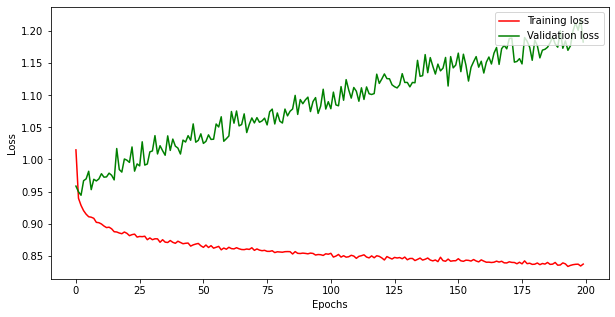

In [8]:
fig1 = plt.figure(figsize=(10,5))
plt.plot(loss, color='r', label="Training loss")
plt.plot(val_loss, color='g', label="Validation loss")
leg = plt.legend(loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

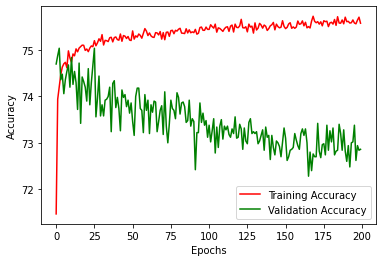

In [9]:
plt.plot(tacc_list, color='r', label="Training Accuracy")
plt.plot(vacc_list, color='g', label="Validation Accuracy")
leg = plt.legend(loc='lower right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Error')

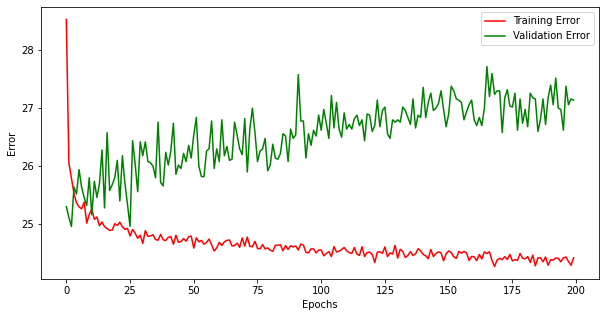

In [10]:
fig1 = plt.figure(figsize=(10,5))
plt.plot(train_error, color='r', label="Training Error")
plt.plot(val_error, color='g', label="Validation Error")
leg = plt.legend(loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Error")